## Linear Regression optimized batch gradient descent

In [335]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [336]:
sample_size = 1000
parameters_size = 3 #includes bias
learning_rate = 0.1
np.random.seed(42)

In [337]:
X = np.random.randn(sample_size, parameters_size)
print("X shape: ",X.shape)
X

X shape:  (1000, 3)


array([[ 0.49671415, -0.1382643 ,  0.64768854],
       [ 1.52302986, -0.23415337, -0.23413696],
       [ 1.57921282,  0.76743473, -0.46947439],
       ...,
       [ 0.60211832,  0.07203686, -0.21220897],
       [-0.95191846,  0.07748052,  0.25775254],
       [-1.24176058,  0.33417642, -0.15525905]])

In [338]:
Y_true_params = np.random.randn(parameters_size, 1)
print("Y True Params Shape: ", Y_true_params.shape)
print("Y params: \n", Y_true_params)


Y True Params Shape:  (3, 1)
Y params: 
 [[-1.90780756]
 [-0.86038501]
 [-0.41360553]]


In [339]:
noise_strength = 0.1
noise = noise_strength * np.random.randn(sample_size, 1)
Y_true = X @ Y_true_params + noise
print("Y True Shape: ",Y_true.shape)
Y_true


Y True Shape:  (1000, 1)


array([[-9.07793281e-01],
       [-2.55169016e+00],
       [-3.61249444e+00],
       [-3.95150483e-01],
       [ 1.74324535e+00],
       [ 1.92245578e+00],
       [ 2.29414722e+00],
       [ 9.52557592e-01],
       [ 1.55177832e+00],
       [-2.08049201e-01],
       [-5.79861255e-01],
       [ 1.75679135e+00],
       [ 1.94078224e+00],
       [-1.23375241e+00],
       [ 8.08009090e-01],
       [ 1.28730343e+00],
       [ 7.82466910e-01],
       [ 1.18410990e+00],
       [-2.46741926e+00],
       [-1.39729907e-01],
       [ 1.64688677e+00],
       [ 8.35124449e-01],
       [-9.14469948e-01],
       [ 3.02726936e-01],
       [-1.49383817e-01],
       [-1.57023538e+00],
       [ 1.62931421e+00],
       [-1.98733325e+00],
       [ 1.52971422e+00],
       [-3.38335492e-01],
       [-8.26469272e-01],
       [ 1.57369660e+00],
       [-7.46976250e-01],
       [ 1.80503719e+00],
       [ 1.42785572e+00],
       [-2.56217696e+00],
       [ 3.45648832e-01],
       [-9.59026749e-01],
       [ 1.3

In [340]:
# plt.scatter(X, Y_true)
# plt.xlabel("True Parameter(s)")
# plt.ylabel("True Output")
# plt.title("Data plotted")

In [341]:
def calc_gradient(theta, X, y_true): # functions is mean squared error

    y_pred = X @ theta
    error = y_true - y_pred

    gradient = -(2/sample_size) * (X.T @ error) # i had initlaly error.T @ X and then tranposed gradient

    return gradient



## Gradient Descent

In [342]:
def mean_squared_error(Y_true, X, theta):

    total_mse = (Y_true - X @ theta)**2

    return np.average(total_mse, axis=0)[0]

In [343]:
def batch_gradient_descent(parameters, epochs, X, y_true, lr, verbose=False, lr_sch=None, lr_decay_rate=0):


    loss = []
    for i in range(epochs):

        parameters = parameters - lr*calc_gradient(parameters, X, y_true)

        if lr_sch:
             
            lr = lr_sch(lr, lr_decay_rate)
        
        if verbose:
                print(f"Epoch {i+1}: Mean Squared Error: {mean_squared_error(Y_true, X, parameters)}")

        loss.append(mean_squared_error(Y_true, X, parameters))
    return (parameters, loss)


In [344]:
def mini_batch_gradient_descent(parameters, batch_size, epochs, X, y_true, lr, verbose=False, lr_sch=None, lr_decay_rate=0): #random indices are generated without concern for duplicates or ensuring every obseravtion is seen equally

    loss = []

    for i in range(epochs):

        random_indices = np.random.randint(low=0, high=X.shape[0]-1, size=(batch_size))
        X_batch = X[random_indices]
        y_true_batch = y_true[random_indices]

        parameters = parameters - lr*calc_gradient(parameters, X_batch, y_true_batch)

        if lr_sch:
             
            lr = lr_sch(lr, lr_decay_rate)

        if verbose:
            print(f"Epoch {i+1}: Mean Squared Error: {mean_squared_error(Y_true, X, parameters)}")
        
        loss.append(mean_squared_error(Y_true, X, parameters))

    return (parameters, loss)



In [345]:
def stochastic_gradient_descent(parameters, epochs, X, y_true, lr, verbose=False, lr_sch=None, lr_decay_rate=0):

    loss = []
    for i in range(epochs):

        random_index = np.random.randint(low=0, high=parameters.shape[0]-1, size=1)
        X_sample = X[random_index]
        y_sample = y_true[random_index]

        parameters = parameters - lr*calc_gradient(parameters, X_sample, y_sample)

        if lr_sch:
             
            lr = lr_sch(lr, lr_decay_rate)

        if verbose:
            print(f"Epoch {i+1}: Mean Squared Error: {mean_squared_error(Y_true, X, parameters)}")

        loss.append(mean_squared_error(Y_true, X, parameters))
    return (parameters, loss)


## Learning Rate Scheduler

In [346]:
def learning_rate_scheduler(start_lr, decay_rate):

    return start_lr * decay_rate

In [360]:
parameters = np.random.randn(parameters_size, 1)

epochs = 50
lr = 0.1

batch_params, batch_loss = batch_gradient_descent(parameters.copy(), epochs, X, Y_true, lr)
mini_batch_params, mini_batch_loss = mini_batch_gradient_descent(parameters.copy(), 100, epochs, X, Y_true, lr)
stochastic_params, stochastic_loss = stochastic_gradient_descent(parameters.copy(), epochs, X, Y_true, lr, lr_sch=None, lr_decay_rate=0.9)

true_vs_predicted_params = pd.DataFrame({"True params": Y_true_params.flatten(), "Batch GD Params": batch_params.flatten(), "Mini Batch GD": mini_batch_params.flatten(), "Stochastic GD": stochastic_params.flatten()})
print(true_vs_predicted_params)

mse_df = pd.DataFrame({"Mean Squared Error": [round(mean_squared_error(Y_true, X, batch_params), 3), round(mean_squared_error(Y_true, X, mini_batch_params), 3), round(mean_squared_error(Y_true, X, stochastic_params), 3)]}, index=["Batch GD", "Mini Batch GD", "Stochastic GD"])
print(mse_df)


   True params  Batch GD Params  Mini Batch GD  Stochastic GD
0    -1.907808        -1.909791      -1.589925      -1.112137
1    -0.860385        -0.859335      -0.861843      -0.874943
2    -0.413606        -0.410500       0.073837       0.816751
               Mean Squared Error
Batch GD                    0.010
Mini Batch GD               0.328
Stochastic GD               2.028


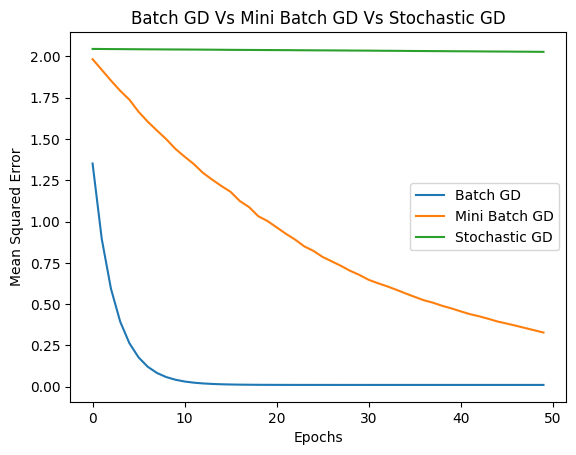

In [361]:
num_epochs = np.arange(epochs)
plt.plot(num_epochs, batch_loss, label="Batch GD")
plt.plot(num_epochs, mini_batch_loss, label="Mini Batch GD")
plt.plot(num_epochs, stochastic_loss, label="Stochastic GD")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Batch GD Vs Mini Batch GD Vs Stochastic GD")
plt.legend()